# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

**Цель работы:** изучить рекурсивные алгоритмы и рекурсивные структуры данных; научиться проводить анализ итеративных и рекурсивных процедур; исследовать эффективность итеративных и  рекурсивных процедур при реализации на ПЭВМ.

## Вариант 9
1. Рекурсивный алгоритм решения уравнений вида $F(x) = x$ методом простых итераций.


2. Реализуйте алгоритмы из задания 1 не используя рекурсию.

3. Для каждого реализованного алгоритма:
- составьте блок-схему;

- оцените верхнюю границу размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов;

- модернизируйте рекурсивную реализацию так, чтобы сохранялись промежуточные результаты вызова рекурсии (реализуйте подобный механизм вручную, а также, с помощью декоратора @memoized);

- сравните производительность реализованных алгоритмов (количество итераций (соответственно вызовов рекурсии) подбирайте исходя из условий задачи).

In [1]:
from wand.image import Image as WImage

In [39]:
#Рекурсивный алгоритм решения уравнения методом простых итераций
import time

def Recursive(a, b, c, x_old=1, max_iterations=100):
    x_new = (a*x_old**2 + c) / -b
    if max_iterations == 0:
        return x_new
    #print(x_new)
    return Recursive(a, b, c, x_new, max_iterations - 1)

a, b, c = 1, 8, 4
start_time = time.time()
x = Recursive(a, b, c)
print(x)
print(str(time.time() - start_time))

-0.5358983848622454
0.00012111663818359375


In [87]:
#Модернизация алгоритма с помощью декоратора @memoized
def memoized(func):
    cache = {}
    def wrapper(*args):
        if args in cache:
            return cache[args]
        result = func(*args)
        cache[args] = result
        return result
    return wrapper

@memoized
def recursive(a, b, c, x_old=1, max_iterations=100):
    x_new = (a*x_old**2 + c) / -b
    if max_iterations == 0:
        return x_new
    return recursive(a, b, c, x_new, max_iterations - 1)

a, b, c = 1, 8, 4
start_time = time.time()
result = recursive(a, b, c)
print(x)
print(str(time.time() - start_time))

-0.5358983848622454
0.00015997886657714844


In [88]:
#Модернизация без использования декоратора
import time

def mod_new_Recursive(a, b, c, x_new=1, max_iterations=100, cache={}):
    #print("Call function")
    key = (x_new)
    if key in cache:
        return cache[key]
    x_new = (a*x_new**2 + c) / -b
    if max_iterations == 0:
        cache[key] = x_new
        return x_new
    return mod_new_Recursive(a, b, c, x_new, max_iterations - 1)
    
a, b, c = 1, 8, 4
start_time = time.time()
x = mod_new_Recursive(a, b, c)
print(x)
print(str(time.time() - start_time))

-0.5358983848622454
0.000133514404296875


## Рекурсивный алгоритм решения уравнения методом простых итераций
Верхняя граница для такого алгоритма 2971 итерация, после нее происходит переполнение стека вызовов.

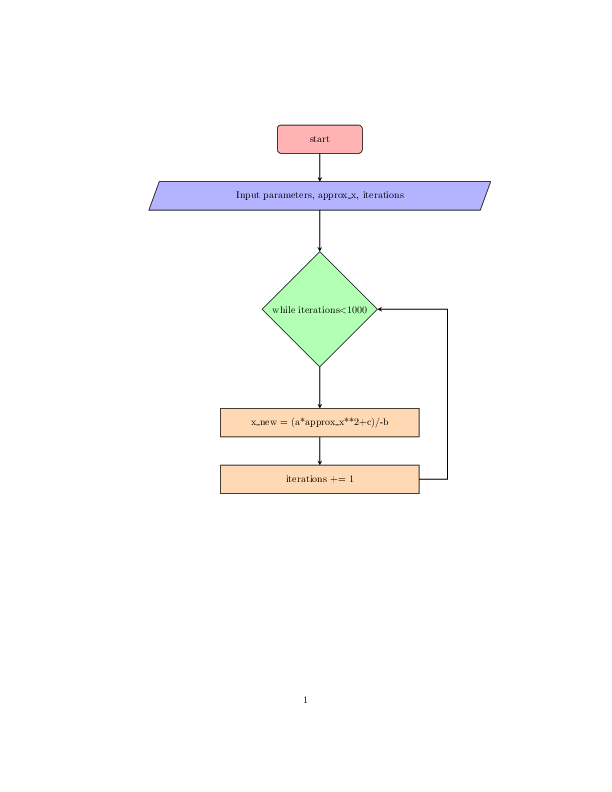

In [69]:
img = WImage(filename='./img/test_2-1.pdf')
img

In [ ]:
#Алгоритм решения уравнения методом простых итераций без рекурсии
def Without_recursive(a, b, c, max_iterations=100):
    x_old = 0
    for i in range(max_iterations):
        x_new = (a*x_old**2 + c) / -b  
        x_old = x_new
    #print(x_new)
    return x_new
a, b, c = 1, 8, 4
start_time = time.time()
x = Without_recursive(a, b, c)
print(x)
print(str(time.time() - start_time))

## Алгоритм решения уравнения методом простых итераций без рекурсии
Так как рекурсия не используется, то переполнение стека вызовов не происходит

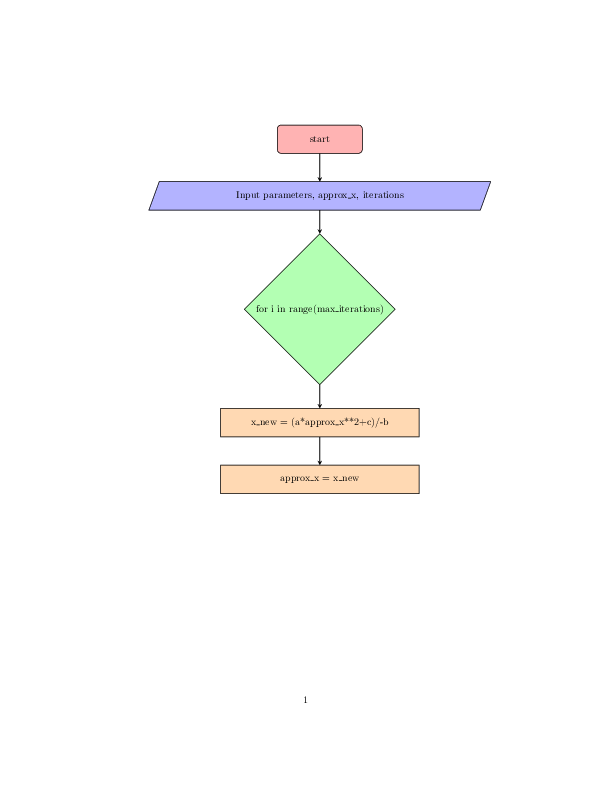

In [5]:
img = WImage(filename='./img/test_2-2.pdf')
img